In [1]:
import numpy as np
import pandas as pd
import sys

try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.dataset import CarEvaluation, HayesRoth, Animals
from pathlib import Path

data_path = Path('../data')

%load_ext autoreload
%autoreload 2

The first dataset we run experiments on is the Animals dataset, where a complete analysis can be found in the specific notebook. We try to run experiments on the other datasets here in order to check whether the models are also able to perform correctly either for classfication of for clustering the data.

## 0. Animals dataset

Iteration 0
--------------------
Current mu: [[1 2 2 1 2 2 2 2 2 2 2 1 1 2 1]
 [1 1 1 1 2 1 2 2 1 1 2 2 2 2 1]
 [2 1 2 1 2 2 1 2 2 1 1 2 1 2 2]
 [2 2 2 1 2 1 2 2 2 2 1 2 1 1 2]
 [2 1 2 1 2 1 1 1 1 1 2 2 1 1 1]
 [2 2 1 2 1 1 2 1 2 2 2 2 2 2 1]
 [2 2 1 1 2 1 1 2 2 1 2 1 1 2 1]]
Current pi: [[0.95894927 0.65279032 0.63505887 0.99529957 0.58185033 0.41436859
  0.4746975  0.6235101  0.33800761 0.67475232 0.31720174 0.77834548
  0.94957105 0.66252687 0.01357164]
 [0.6228461  0.67365963 0.971945   0.87819347 0.50962438 0.05571469
  0.45115921 0.01998767 0.44171092 0.97958673 0.35944446 0.48089353
  0.68866118 0.88047589 0.91823547]
 [0.21682214 0.56518887 0.86510256 0.50896896 0.91672295 0.92115761
  0.08311249 0.27771856 0.0093567  0.84234208 0.64717414 0.84138612
  0.26473016 0.39782075 0.55282148]
 [0.16494046 0.36980809 0.14644176 0.56961841 0.70373728 0.28847644
  0.43328806 0.75610669 0.39609828 0.89603839 0.63892108 0.89155444
  0.68005557 0.44919774 0.97857093]
 [0.11620191 0.7670237 

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2a745df10>,
 {'1.0': {'precision': 1.0,
   'recall': 0.8536585365853658,
   'f1-score': 0.9210526315789475,
   'support': 41.0},
  '2.0': {'precision': 1.0,
   'recall': 0.5,
   'f1-score': 0.6666666666666666,
   'support': 20.0},
  '3.0': {'precision': 0.25,
   'recall': 0.8,
   'f1-score': 0.38095238095238093,
   'support': 5.0},
  '4.0': {'precision': 0.9285714285714286,
   'recall': 1.0,
   'f1-score': 0.962962962962963,
   'support': 13.0},
  '5.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4.0},
  '6.0': {'precision': 0.8,
   'recall': 1.0,
   'f1-score': 0.888888888888889,
   'support': 8.0},
  '7.0': {'precision': 0.7, 'recall': 0.7, 'f1-score': 0.7, 'support': 10.0},
  'accuracy': 0.7623762376237624,
  'macro avg': {'precision': 0.6683673469387755,
   'recall': 0.6933797909407665,
   'f1-score': 0.6457890758642638,
   'support': 101.0},
  'weighted avg': {'precision': 0.8685289957567186,
 

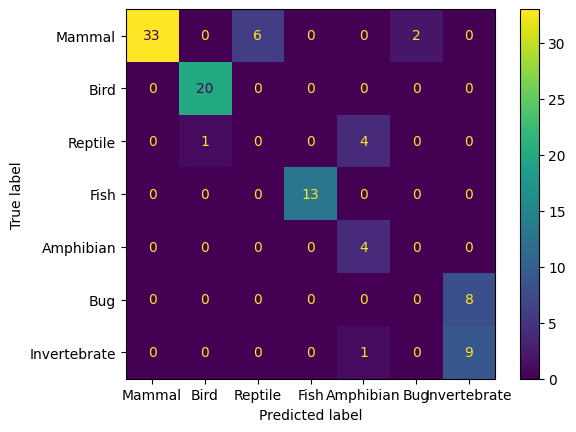

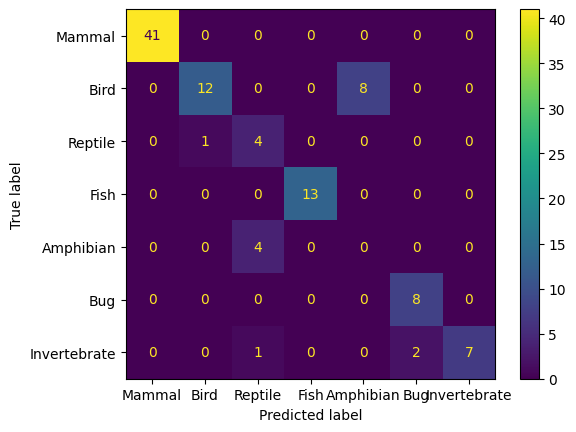

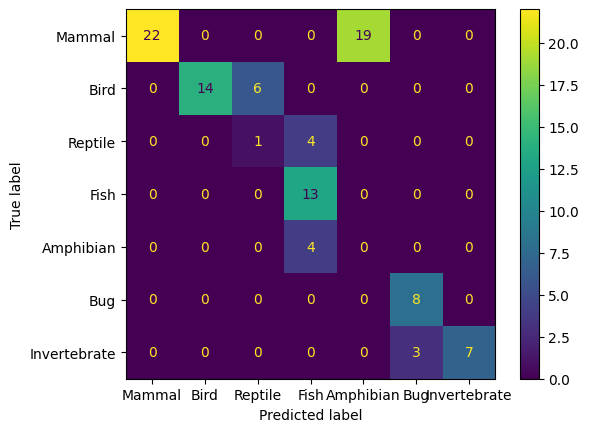

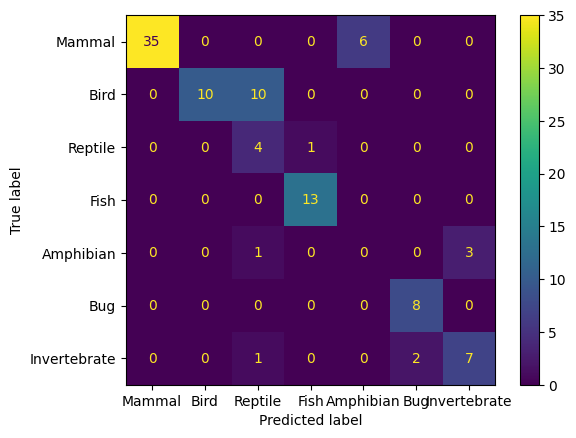

In [2]:
animals = Animals(data_path.joinpath('zoo.csv'), data_path.joinpath('zoo_target.csv'))
animals.cluster_bos()
animals.classification_results()

animals.cluster_bos(init="kmeans")
animals.classification_results()

animals.cluster_kmeans()
animals.classification_results()


animals.cluster_gaussian()
animals.classification_results()

## 1. Car Evaluation Dataset

Since this dataset has a lot of observations and the algorithm is not able to handle it, we decided to take a sample of the dataset and run the experiments on it, which is shuffled.

In [4]:
car = CarEvaluation(data_path.joinpath('car_evaluation.csv'))
car.compute_Xy(n=250)

print(f"Number of samples: {car.X.shape[0]}")
print(f"Number of clusters: {car.n_clusters}")
print(f"Number of features: {car.X.shape[1]}")
print(f"Number of unique values per feature: {car.m}")

car.cluster_bos()

Number of samples: 250
Number of clusters: 4
Number of features: 6
Number of unique values per feature: [4, 4, 4, 3, 3, 3]
Iteration 0
--------------------
Current mu: [[1 4 2 1 2 2]
 [3 1 4 3 1 1]
 [1 3 2 3 3 1]
 [2 2 2 2 1 2]]
Current pi: [[0.64817187 0.36824154 0.95715516 0.14035078 0.87008726 0.47360805]
 [0.80091075 0.52047748 0.67887953 0.72063265 0.58201979 0.53737323]
 [0.75861562 0.10590761 0.47360042 0.18633234 0.73691818 0.21655035]
 [0.13521817 0.32414101 0.14967487 0.22232139 0.38648898 0.90259848]]
Log-likelihood: -2107.8279779497693

Iteration 1
--------------------
Current mu: [[1 4 2 1 2 3]
 [3 1 4 3 1 1]
 [1 3 1 1 3 3]
 [4 2 1 2 1 2]]
Current pi: [[0.25230935 0.32840488 0.66196644 0.14747686 0.75530384 0.08694245]
 [0.53191761 0.21660192 0.39846828 0.29225482 0.35612344 0.17231899]
 [0.32812473 0.09578057 0.15515546 0.05300379 0.48654299 0.05996659]
 [0.08322058 0.15407609 0.04386441 0.20751533 0.25356185 0.57053057]]
Log-likelihood: -1884.7915271807474

Iteration 2
-

array([1, 3, 3, 3, 1, 4, 3, 3, 3, 3, 4, 3, 4, 4, 4, 1, 4, 2, 2, 4, 4, 3,
       1, 1, 3, 4, 3, 1, 1, 3, 3, 3, 2, 2, 4, 2, 3, 4, 3, 2, 4, 1, 3, 2,
       4, 3, 3, 2, 4, 3, 4, 3, 1, 1, 3, 3, 1, 3, 2, 4, 2, 4, 3, 2, 4, 3,
       1, 1, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 4, 4, 1, 2, 4, 3, 4, 4, 3, 4,
       2, 3, 4, 4, 3, 3, 2, 4, 2, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 2, 4,
       1, 2, 4, 4, 4, 1, 4, 4, 3, 2, 4, 3, 2, 3, 3, 4, 3, 3, 4, 4, 3, 2,
       2, 4, 4, 2, 3, 3, 1, 4, 2, 3, 4, 1, 3, 3, 3, 2, 3, 4, 1, 4, 2, 3,
       4, 1, 2, 3, 2, 2, 3, 1, 1, 3, 3, 2, 4, 2, 4, 2, 4, 3, 3, 4, 4, 3,
       4, 2, 2, 3, 4, 1, 2, 1, 4, 4, 4, 3, 4, 2, 3, 1, 1, 2, 4, 3, 3, 3,
       4, 4, 1, 2, 1, 3, 3, 2, 2, 3, 4, 4, 4, 2, 4, 4, 4, 2, 3, 1, 4, 4,
       4, 1, 3, 1, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 2, 2, 3, 4, 3, 3, 2, 2,
       3, 4, 4, 4, 3, 2, 3, 3])

In [5]:
print(f"Estimated alpha: {car.ordinal_clustering.alpha}")
print(f"Estimated mu: {car.ordinal_clustering.mu}")
print(f"Estimated pi: {car.ordinal_clustering.pi}")

Estimated alpha: [0.13453566 0.21920338 0.31659335 0.32966761]
Estimated mu: [[1 4 2 1 2 3]
 [3 3 4 3 1 3]
 [1 1 1 1 3 3]
 [4 2 1 2 1 2]]
Estimated pi: [[0.17451141 0.2991184  0.38329863 0.14179623 0.72321428 0.20595291]
 [0.45420102 0.14357229 0.31985115 0.15539596 0.30481304 0.1318784 ]
 [0.16640078 0.08083414 0.15797378 0.06856534 0.35009685 0.08227467]
 [0.08860873 0.12537164 0.04883357 0.17709862 0.23124046 0.30260359]]


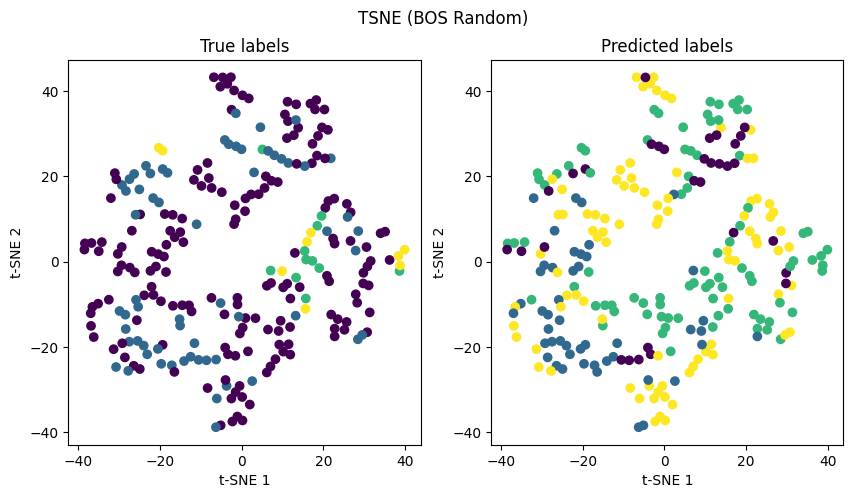

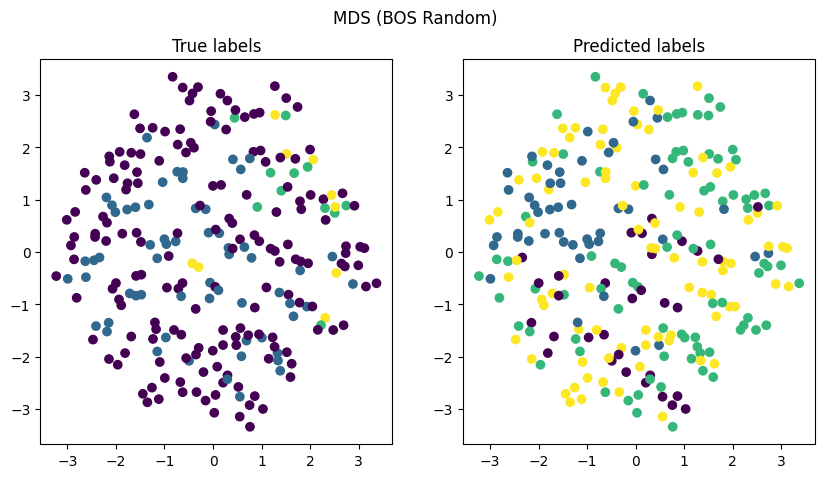

In [6]:
car.plot_tsne()
car.plot_mds()

After plotting the data in a lower dimensional space using both t-SNE and MDS, we can see first that clustering the dataset using the features is not an easy task because it doesn't seem to have a clear structure. We also notice that the BOS model is struggling to separate correctly the data. This can also be captured using the classification scores and the assignment matrix in the following cells.

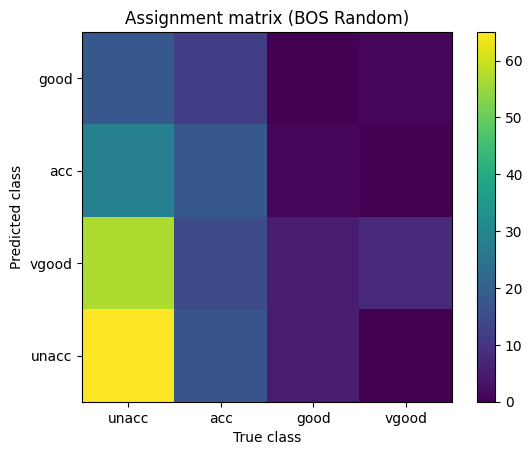

In [7]:
car.plot_assignment_matrix()

              precision    recall  f1-score   support

           1       0.75      0.39      0.51       168
           2       0.38      0.29      0.33        62
           3       0.00      0.00      0.00        11
           4       0.09      0.89      0.17         9

    accuracy                           0.36       250
   macro avg       0.31      0.39      0.25       250
weighted avg       0.60      0.36      0.43       250



(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2be7d3a10>,
 {'1': {'precision': 0.7471264367816092,
   'recall': 0.3869047619047619,
   'f1-score': 0.5098039215686274,
   'support': 168.0},
  '2': {'precision': 0.3829787234042553,
   'recall': 0.2903225806451613,
   'f1-score': 0.3302752293577982,
   'support': 62.0},
  '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11.0},
  '4': {'precision': 0.09411764705882353,
   'recall': 0.8888888888888888,
   'f1-score': 0.1702127659574468,
   'support': 9.0},
  'accuracy': 0.364,
  'macro avg': {'precision': 0.30605570181117203,
   'recall': 0.39152905785970304,
   'f1-score': 0.2525729792209681,
   'support': 250.0},
  'weighted avg': {'precision': 0.6004359242156142,
   'recall': 0.364,
   'f1-score': 0.43062415174931973,
   'support': 250.0}})

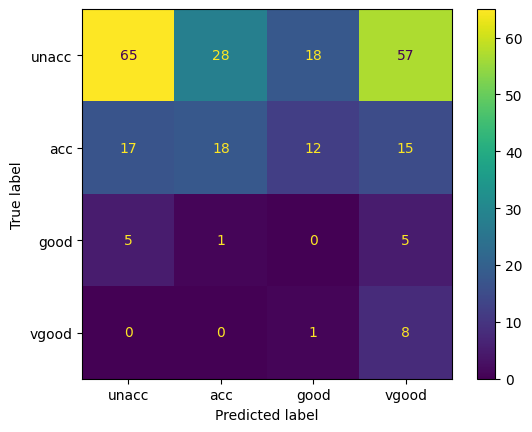

In [8]:
car.classification_results()

Iteration 0
--------------------
Current mu: [[3.27941176 2.80882353 3.61764706 2.05882353 1.94117647 2.08823529]
 [3.453125   2.296875   1.5        1.921875   1.953125   2.15625   ]
 [1.57377049 3.57377049 1.75409836 1.96721311 1.96721311 2.2295082 ]
 [1.56140351 1.43859649 2.89473684 1.8245614  1.98245614 2.05263158]]
Current pi: [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Log-likelihood: -1863.6799873410002

Converged, stopping...
Clustered data into 4 clusters
Estimated alpha: [0.272 0.256 0.244 0.228]
Estimated mu: [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
Estimated pi: [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80       168
           2       0.00      0.00      0.00        62
           3       0.00      0.00      0.00        11
           4       0.00      0.0

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2c1940c10>,
 {'1': {'precision': 0.734375,
   'recall': 0.27976190476190477,
   'f1-score': 0.4051724137931035,
   'support': 168.0},
  '2': {'precision': 0.38461538461538464,
   'recall': 0.3225806451612903,
   'f1-score': 0.3508771929824561,
   'support': 62.0},
  '3': {'precision': 0.125,
   'recall': 0.8181818181818182,
   'f1-score': 0.21686746987951808,
   'support': 11.0},
  '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9.0},
  'accuracy': 0.304,
  'macro avg': {'precision': 0.31099759615384615,
   'recall': 0.35513109202625337,
   'f1-score': 0.2432292691637694,
   'support': 250.0},
  'weighted avg': {'precision': 0.5943846153846154,
   'recall': 0.304,
   'f1-score': 0.3688355746033135,
   'support': 250.0}})

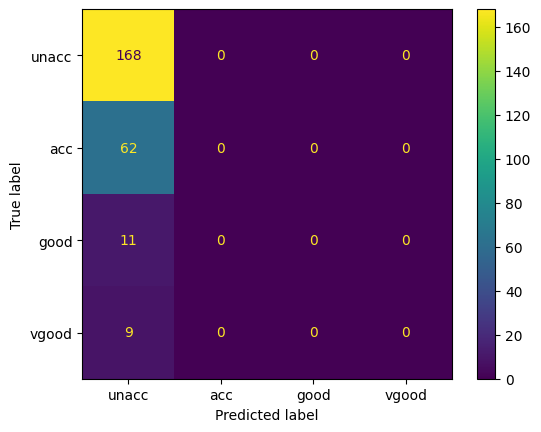

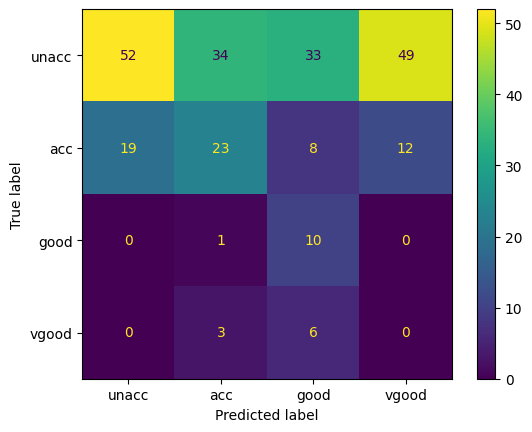

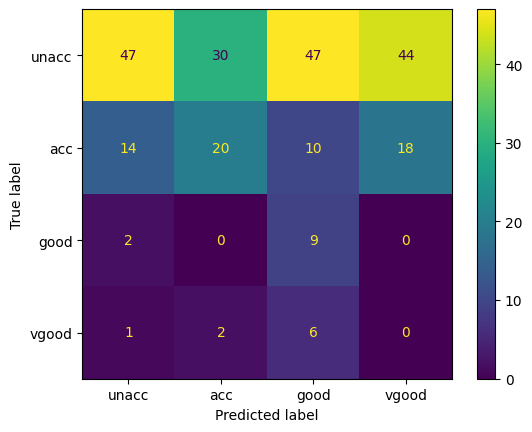

In [9]:
car.cluster_bos(init="kmeans")
car.classification_results()

car.cluster_kmeans()
car.classification_results()

car.cluster_gaussian()
car.classification_results()

## 2. Hayes-Roth Dataset

This dataset is very small and the algorithm is able to handle it. We try to compare the results of the BOS model with other models as well and with the previous dataset.

In [10]:
hayesroth = HayesRoth(data_path.joinpath('hayes-roth.csv'))

hayesroth.cluster_bos()

Iteration 0
--------------------
Current mu: [[1 4 2 1]
 [2 4 2 3]
 [1 4 3 1]]
Current pi: [[0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293 ]
 [0.0202184  0.83261985 0.77815675 0.87001215]]
Log-likelihood: -949.466108246221

Iteration 1
--------------------
Current mu: [[1 1 2 1]
 [2 2 1 2]
 [3 1 2 1]]
Current pi: [[0.62249601 0.00756227 0.5129231  0.37980218]
 [0.39484468 0.05689303 0.06508169 0.08096169]
 [0.00294413 0.03518976 0.2393016  0.63081636]]
Log-likelihood: -677.4331676385648

Iteration 2
--------------------
Current mu: [[1 1 2 1]
 [2 2 1 2]
 [3 1 2 1]]
Current pi: [[0.46015078 0.01151237 0.50042716 0.37375651]
 [0.27781911 0.16336619 0.2651725  0.24832375]
 [0.00443479 0.0470518  0.26386369 0.58800499]]
Log-likelihood: -656.9169882868487

Iteration 3
--------------------
Current mu: [[1 1 2 1]
 [2 2 1 2]
 [3 1 2 1]]
Current pi: [[0.37670197 0.01701956 0.51514079 0.38480137]
 [0.20161113 0.27887325 0.42073498 0.36135725]
 [0.00578

array([2, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2, 1, 2,
       3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 1, 1, 2, 1,
       3, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 3,
       2, 2, 3, 1, 1, 2, 2, 3, 2, 3, 3, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 3, 2, 1, 2])

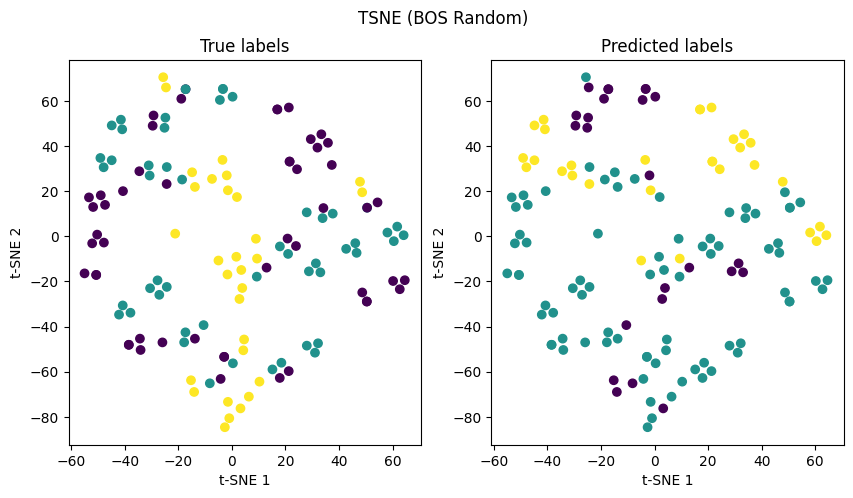

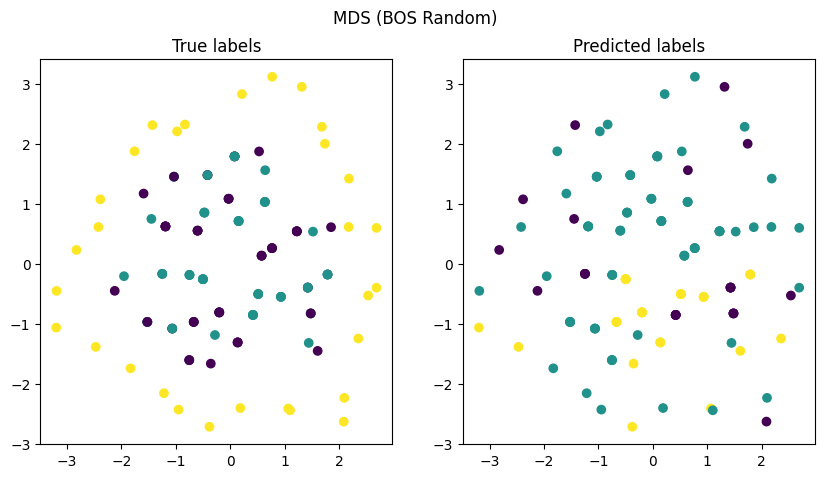

In [11]:
hayesroth.plot_tsne()
hayesroth.plot_mds()


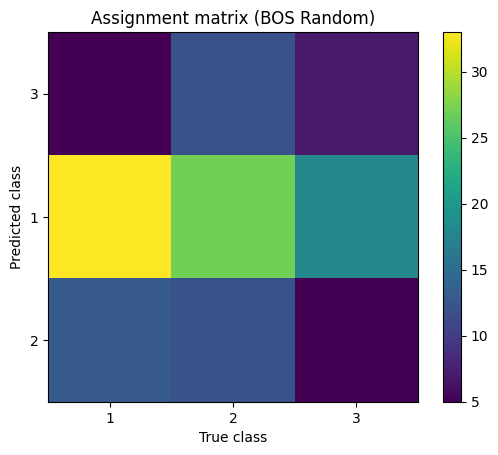

In [12]:
hayesroth.plot_assignment_matrix()

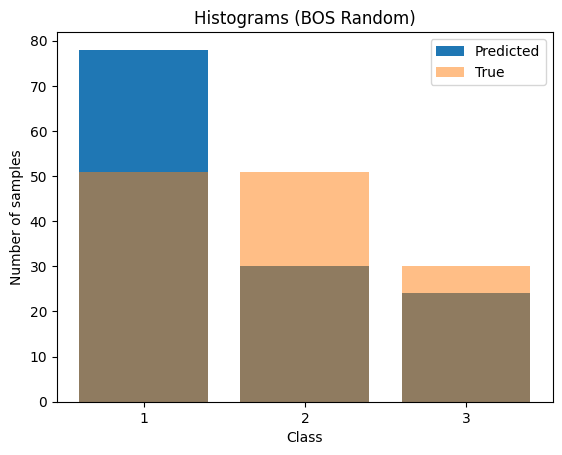

In [13]:
hayesroth.plot_histograms()

              precision    recall  f1-score   support

           1       0.42      0.65      0.51        51
           2       0.40      0.24      0.30        51
           3       0.29      0.23      0.26        30

    accuracy                           0.39       132
   macro avg       0.37      0.37      0.36       132
weighted avg       0.38      0.39      0.37       132



(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2c14f7210>,
 {'1': {'precision': 0.4230769230769231,
   'recall': 0.6470588235294118,
   'f1-score': 0.5116279069767442,
   'support': 51.0},
  '2': {'precision': 0.4,
   'recall': 0.23529411764705882,
   'f1-score': 0.29629629629629634,
   'support': 51.0},
  '3': {'precision': 0.2916666666666667,
   'recall': 0.23333333333333334,
   'f1-score': 0.2592592592592593,
   'support': 30.0},
  'accuracy': 0.3939393939393939,
  'macro avg': {'precision': 0.3715811965811966,
   'recall': 0.3718954248366013,
   'f1-score': 0.35572782084409993,
   'support': 132.0},
  'weighted avg': {'precision': 0.3842948717948718,
   'recall': 0.3939393939393939,
   'f1-score': 0.37107509200532457,
   'support': 132.0}})

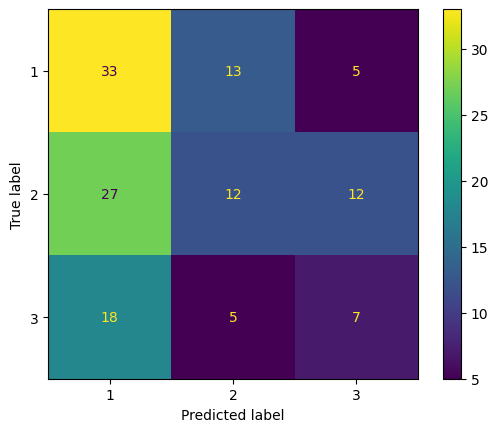

In [14]:
hayesroth.classification_results()

Iteration 0
--------------------
Current mu: [[1.60465116 1.1627907  2.58139535 2.1627907 ]
 [2.42857143 2.         1.26785714 2.23214286]
 [1.78787879 2.90909091 2.3030303  1.21212121]]
Current pi: [[0.         0.         0.         0.        ]
 [0.         0.57142857 0.         0.        ]
 [0.         0.         0.         0.        ]]
Log-likelihood: -687.9467185944271

Converged, stopping...
Clustered data into 3 clusters
Estimated alpha: [0.33013419 0.41650701 0.2533588 ]
Estimated mu: [[1. 1. 1. 1.]
 [1. 2. 1. 1.]
 [1. 1. 1. 1.]]
Estimated pi: [[0.         0.         0.         0.        ]
 [0.         0.55540353 0.         0.        ]
 [0.         0.         0.         0.        ]]
              precision    recall  f1-score   support

           1       0.44      0.71      0.54        51
           2       0.56      0.55      0.55        51
           3       0.00      0.00      0.00        30

    accuracy                           0.48       132
   macro avg       0.33      

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2d136c410>,
 {'1': {'precision': 0.56,
   'recall': 0.5490196078431373,
   'f1-score': 0.5544554455445545,
   'support': 51.0},
  '2': {'precision': 0.39473684210526316,
   'recall': 0.29411764705882354,
   'f1-score': 0.3370786516853933,
   'support': 51.0},
  '3': {'precision': 0.38636363636363635,
   'recall': 0.5666666666666667,
   'f1-score': 0.4594594594594595,
   'support': 30.0},
  'accuracy': 0.45454545454545453,
  'macro avg': {'precision': 0.4470334928229665,
   'recall': 0.46993464052287587,
   'f1-score': 0.4503311855631358,
   'support': 132.0},
  'weighted avg': {'precision': 0.4566855154414964,
   'recall': 0.45454545454545453,
   'f1-score': 0.4488789601705388,
   'support': 132.0}})

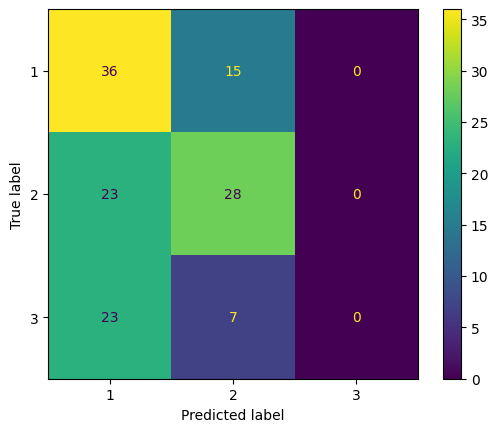

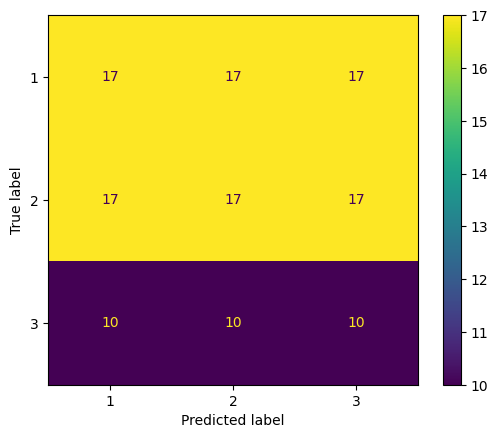

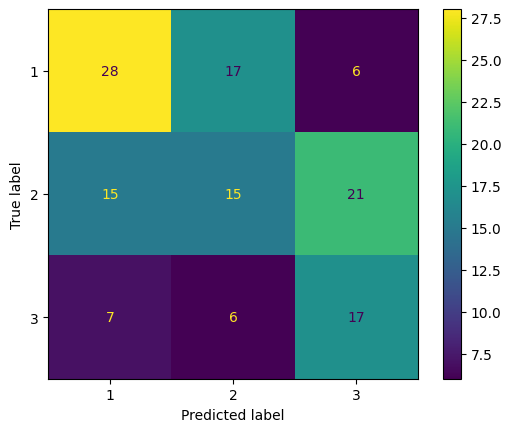

In [15]:
hayesroth.cluster_bos(init="kmeans")
hayesroth.classification_results()

hayesroth.cluster_kmeans()
hayesroth.classification_results()

hayesroth.cluster_gaussian()
hayesroth.classification_results()

## 3. Caesarian Dataset

In [16]:
from src.dataset import Caesarian

caesarian = Caesarian(data_path.joinpath('caesarian.csv'))

In [17]:
caesarian.cluster_bos()

Iteration 0
--------------------
Current mu: [[1 4 2 1 2]
 [4 4 2 2 1]]
Current pi: [[0.43758721 0.891773   0.96366276 0.38344152 0.79172504]
 [0.52889492 0.56804456 0.92559664 0.07103606 0.0871293 ]]
Log-likelihood: -738.1769351785452

Iteration 1
--------------------
Current mu: [[1 1 1 1 2]
 [3 1 1 2 1]]
Current pi: [[0.43083679 0.00663812 0.15241119 0.33242016 0.47356419]
 [0.08836496 0.0071187  0.04678029 0.22746817 0.29943149]]
Log-likelihood: -442.50965288569193

Iteration 2
--------------------
Current mu: [[1 1 1 1 2]
 [3 1 1 2 1]]
Current pi: [[0.41357381 0.01464386 0.1897847  0.31211769 0.33797124]
 [0.09162219 0.10630449 0.25282323 0.27579431 0.30644524]]
Log-likelihood: -429.3209072046294

Iteration 3
--------------------
Current mu: [[1 1 1 1 2]
 [3 1 1 2 1]]
Current pi: [[0.40247646 0.03072317 0.1878445  0.30922101 0.27974952]
 [0.09430777 0.35458937 0.34735487 0.29156098 0.30389721]]
Log-likelihood: -418.952067570523

Converged, stopping...
Clustered data into 2 cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

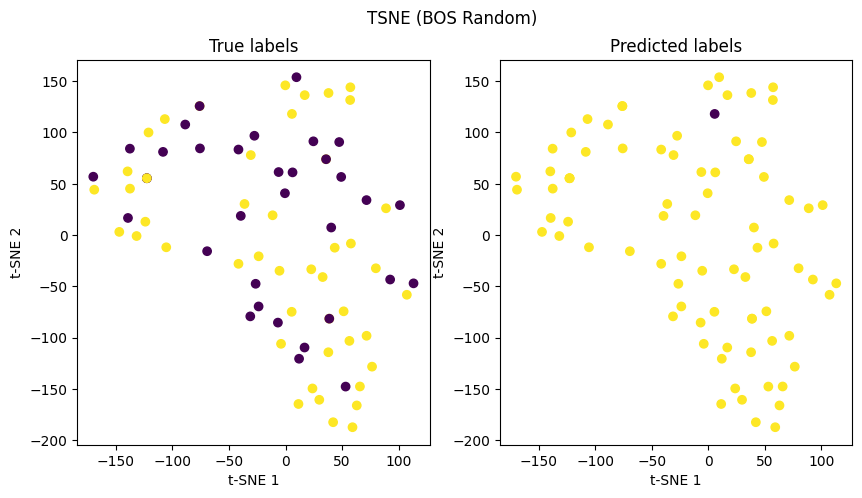

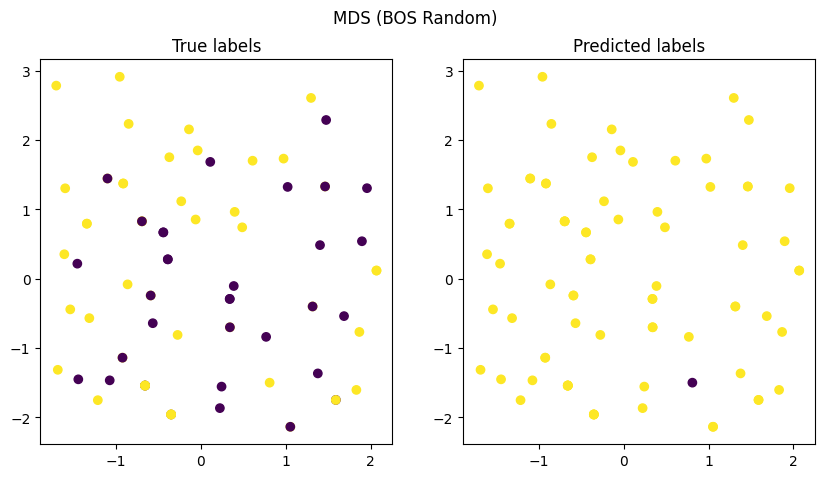

In [18]:
caesarian.plot_tsne()
caesarian.plot_mds()

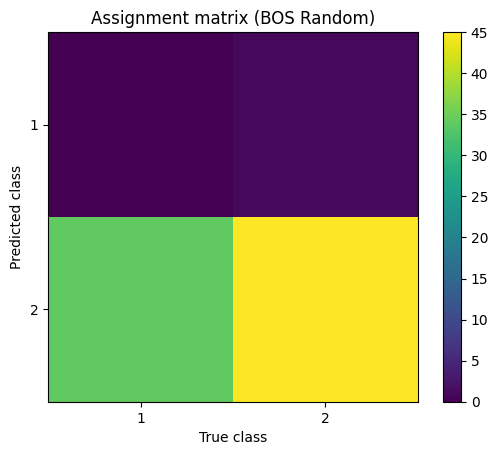

In [19]:
caesarian.plot_assignment_matrix()

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.57      0.98      0.72        46

    accuracy                           0.56        80
   macro avg       0.28      0.49      0.36        80
weighted avg       0.33      0.56      0.41        80



(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2d145df10>,
 {'1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 34.0},
  '2': {'precision': 0.569620253164557,
   'recall': 0.9782608695652174,
   'f1-score': 0.7200000000000001,
   'support': 46.0},
  'accuracy': 0.5625,
  'macro avg': {'precision': 0.2848101265822785,
   'recall': 0.4891304347826087,
   'f1-score': 0.36000000000000004,
   'support': 80.0},
  'weighted avg': {'precision': 0.3275316455696203,
   'recall': 0.5625,
   'f1-score': 0.41400000000000003,
   'support': 80.0}})

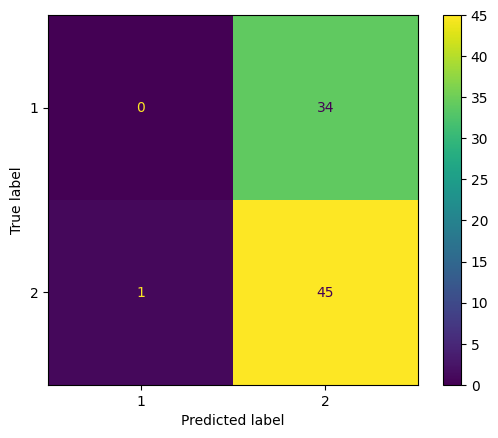

In [20]:
caesarian.classification_results()

Iteration 0
--------------------
Current mu: [[1.41463415 1.31707317 1.73170732 1.90243902 1.24390244]
 [3.33333333 2.02564103 1.53846154 2.1025641  1.51282051]]
Current pi: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Log-likelihood: -453.0368384108756

Converged, stopping...
Clustered data into 2 clusters
Estimated alpha: [0.5125 0.4875]
Estimated mu: [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Estimated pi: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.57      1.00      0.73        46

    accuracy                           0.57        80
   macro avg       0.29      0.50      0.37        80
weighted avg       0.33      0.57      0.42        80

Clustered data into 2 clusters
Estimated means: [[1.41463415 1.31707317 1.73170732 1.90243902 1.24390244]
 [3.33333333 2.02564103 1.53846154 2.1025641  1.51282051]]
              precision    recall  f1-score   support

           1     

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2d139b1d0>,
 {'1': {'precision': 0.5294117647058824,
   'recall': 0.5294117647058824,
   'f1-score': 0.5294117647058824,
   'support': 34.0},
  '2': {'precision': 0.6521739130434783,
   'recall': 0.6521739130434783,
   'f1-score': 0.6521739130434783,
   'support': 46.0},
  'accuracy': 0.6,
  'macro avg': {'precision': 0.5907928388746804,
   'recall': 0.5907928388746804,
   'f1-score': 0.5907928388746804,
   'support': 80.0},
  'weighted avg': {'precision': 0.6,
   'recall': 0.6,
   'f1-score': 0.6,
   'support': 80.0}})

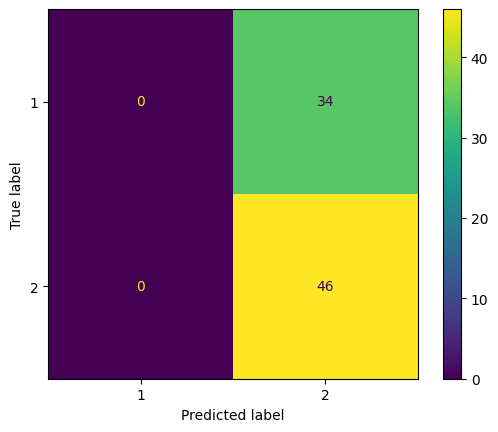

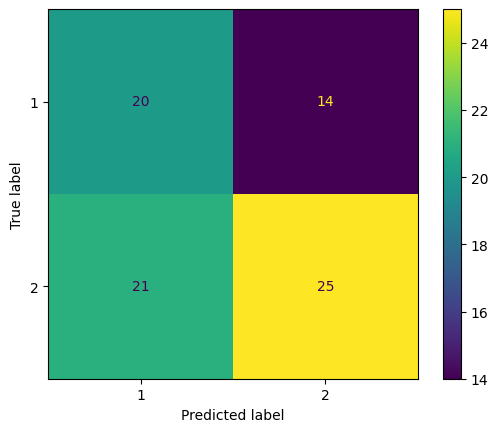

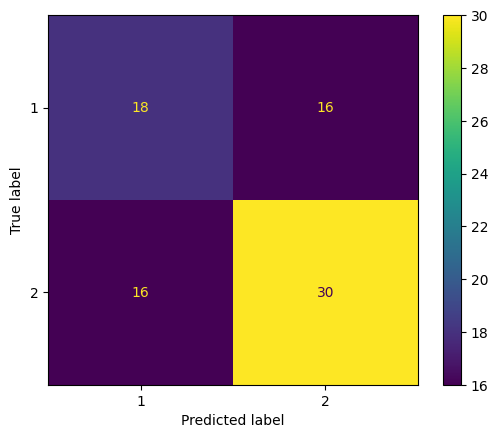

In [21]:
caesarian.cluster_bos(init="kmeans")
caesarian.classification_results()

caesarian.cluster_kmeans()
caesarian.classification_results()

caesarian.cluster_gaussian()
caesarian.classification_results()

## Comparing the different scores

In [23]:
#multi index: dataset, method

runtypes = ["BOS Random", "BOS K-Means", "K-Means", "Gaussian"]

index = pd.MultiIndex.from_product([['Animal', 'Car Evaluation', 'Hayes-Roth', 'Caesarian'], runtypes], names=['Dataset', 'Method'])

df_scores = pd.DataFrame(columns=['f1-score', 'recall', 'precision', 'accuracy', 'wasserstein-distance', 'adjusted-rand-index'], index=index)

df_scores

f1-score recall precision accuracy  \
Dataset        Method                                           
Animal         BOS Random       NaN    NaN       NaN      NaN   
               BOS K-Means      NaN    NaN       NaN      NaN   
               K-Means          NaN    NaN       NaN      NaN   
               Gaussian         NaN    NaN       NaN      NaN   
Car Evaluation BOS Random       NaN    NaN       NaN      NaN   
               BOS K-Means      NaN    NaN       NaN      NaN   
               K-Means          NaN    NaN       NaN      NaN   
               Gaussian         NaN    NaN       NaN      NaN   
Hayes-Roth     BOS Random       NaN    NaN       NaN      NaN   
               BOS K-Means      NaN    NaN       NaN      NaN   
               K-Means          NaN    NaN       NaN      NaN   
               Gaussian         NaN    NaN       NaN      NaN   
Caesarian      BOS Random       NaN    NaN       NaN      NaN   
               BOS K-Means      NaN    NaN       NaN      NaN   
               K-Means          NaN    NaN       NaN      NaN   
               Gaussian         NaN    NaN       NaN      NaN   

                           wasserstein-distance adjusted-rand-index  
Dataset        Method                                                
Animal         BOS Random                   NaN                 NaN  
               BOS K-Means                  NaN                 NaN  
               K-Means                      NaN                 NaN  
               Gaussian                     NaN                 NaN  
Car Evaluation BOS Random                   NaN                 NaN  
               BOS K-Means                  NaN                 NaN  
               K-Means                      NaN                 NaN  
               Gaussian                     NaN                 NaN  
Hayes-Roth     BOS Random                   NaN                 NaN  
               BOS K-Means                  NaN                 NaN  
               K-Means                      NaN                 NaN  
               Gaussian                     NaN                 NaN  
Caesarian      BOS Random                   NaN                 NaN  
               BOS K-Means                  NaN                 NaN  
               K-Means                      NaN                 NaN  
               Gaussian                     NaN                 NaN

In [25]:
for runtype in runtypes:
    if runtype in animals.scores:
        df_scores.loc['Animal', runtype] = animals.scores[runtype]

for runtype in runtypes:
    if runtype in car.scores:
        df_scores.loc['Car Evaluation', runtype] = car.scores[runtype]

for runtype in runtypes:
    if runtype in hayesroth.scores:
        df_scores.loc['Hayes-Roth', runtype] = hayesroth.scores[runtype]

for runtype in runtypes:
    if runtype in caesarian.scores:
        df_scores.loc['Caesarian', runtype] = caesarian.scores[runtype]

df_scores.to_csv(data_path.joinpath('datasets_scores.csv'))

df_scores

f1-score    recall precision  accuracy  \
Dataset        Method                                                
Animal         BOS Random   0.774336  0.782178  0.793263  0.782178   
               BOS K-Means  0.858901  0.841584  0.901819  0.841584   
               K-Means      0.701506  0.643564  0.847328  0.643564   
               Gaussian     0.788425  0.762376  0.868529  0.762376   
Car Evaluation BOS Random   0.430624     0.364  0.600436     0.364   
               BOS K-Means  0.540172     0.672  0.451584     0.672   
               K-Means      0.398108      0.34  0.593397      0.34   
               Gaussian     0.368836     0.304  0.594385     0.304   
Hayes-Roth     BOS Random   0.371075  0.393939  0.384295  0.393939   
               BOS K-Means  0.423381  0.484848  0.385987  0.484848   
               K-Means       0.33798  0.333333  0.350207  0.333333   
               Gaussian     0.448879  0.454545  0.456686  0.454545   
Caesarian      BOS Random      0.414    0.5625  0.327532    0.5625   
               BOS K-Means  0.419841     0.575  0.330625     0.575   
               K-Means      0.564902    0.5625  0.575907    0.5625   
               Gaussian          0.6       0.6       0.6       0.6   

                           wasserstein-distance adjusted-rand-index  
Dataset        Method                                                
Animal         BOS Random              0.346535            0.763572  
               BOS K-Means             0.168317            0.900987  
               K-Means                 0.841584            0.577954  
               Gaussian                0.326733            0.727979  
Car Evaluation BOS Random                 1.012            0.020204  
               BOS K-Means                0.444                 0.0  
               K-Means                    0.988            0.024096  
               Gaussian                   1.084             0.00868  
Hayes-Roth     BOS Random                  0.25            0.000365  
               BOS K-Means             0.462121            0.032108  
               K-Means                 0.159091           -0.014914  
               Gaussian                0.113636            0.066466  
Caesarian      BOS Random                0.4125           -0.006518  
               BOS K-Means                0.425                 0.0  
               K-Means                   0.0875            0.003286  
               Gaussian                     0.0            0.027748